In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [3]:
# STEP 3: Load data from github
url = "https://github.com/davorbel/Python/raw/94ba28d28b7a9b27453d68e20b1143ff24f5984a/P%20den_proteome%20data.xlsx"
df = pd.read_excel(url, sheet_name='Sheet1')

In [13]:
# STEP 4: Define numeric columns explicitly
numeric_columns = ['WT1', 'WT2','WT3', 'HNOX1', 'HNOX2','HNOX3']

In [14]:
df.dropna(inplace = True)
print(df.shape)

(680, 7)


In [15]:
df


,Protein_ID,WT1,WT2,WT3,HNOX1,HNOX2,HNOX3
0,A1BC01,15.61344,15.81423,15.58804,11.44838,9.827866,11.14683
1,A1BC00,14.85194,14.93482,14.62185,10.25428,11.315630,10.41614
2,A1B273,16.99560,17.12800,17.06636,12.80278,13.247020,13.14112
3,A1BBZ9,17.26671,17.35617,17.21405,13.81062,13.535270,13.53451
4,A1BBZ8,17.77264,17.70656,17.70583,14.19721,14.320820,14.60151
...,...,...,...,...,...,...,...
675,A1B4U3,14.19591,14.18886,14.19786,15.22783,15.294470,15.40209
677,A1AZJ2,17.34474,17.18572,16.93603,18.56973,17.817290,18.86159
678,A1B4T8,10.00464,10.91038,10.23534,12.04909,11.820700,11.20176
679,A1B365,13.28452,13.45007,13.60249,14.83429,14.483020,15.10006


In [17]:
# STEP 5: Transpose the data (rows = samples, columns = metabolites)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Protein_ID']  # Optional: set metabolite names as column headers

In [18]:
# STEP 6: Create labels
labels = ['WT'] * 3 + ['Δhnox'] * 3

In [19]:

# STEP 7: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [20]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [21]:
# Sample names corresponding to the transposed rows
sample_names = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

In [28]:
# Define new color map
color_map = {'WT': '#99CCFF', 'Δhnox': '#F4A4E9'}  # green and purple

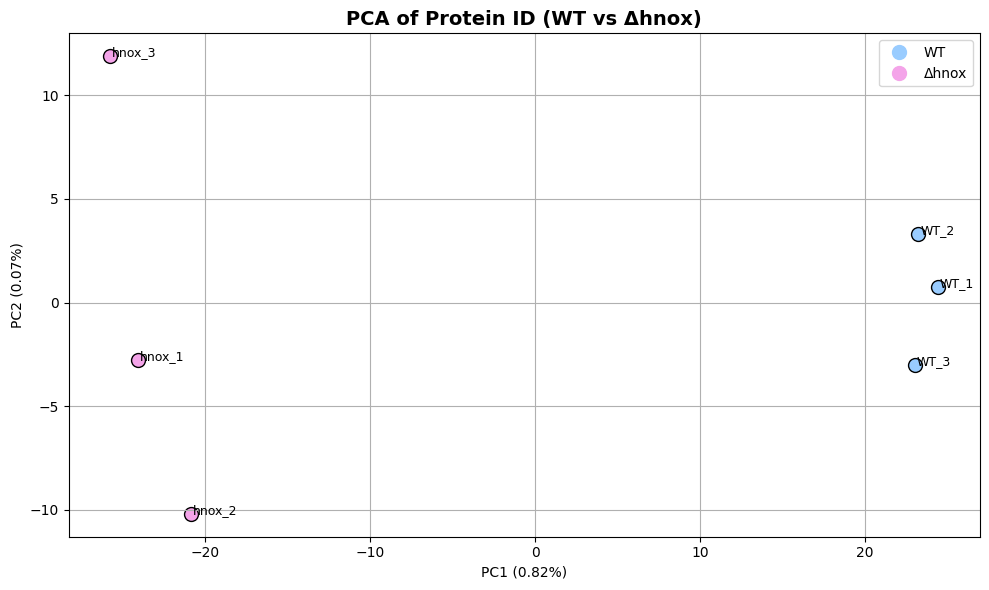

In [30]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of Protein ID (WT vs Δhnox)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()